## Student Perfomance Indicator

#### Life cycle of ML project

 * Understand the problem statement
 * Data collection
 * Data checks to perform
 * Exploratory Data analysis
 * Data pre-processing
 * Model Training
 * Choose best model

### 1) Probelm statement
* how student perfom affected with gender, ethnicity, parental level of education, lunch, test preparation course

### 2) Data Collection
* from kaggle 8x1000

##### 2.1 Import data and required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import CSV data as Pandas dataframe

In [2]:
df=pd.read_csv('data/stud_perfo.csv')
print("Shape of data is ",df.shape)
print(df.head())

Shape of data is  (1000, 8)
   gender race/ethnicity parental level of education         lunch   
0  female        group B           bachelor's degree      standard  \
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [4]:
print("Catogeries in 'gender'  :  ",df['gender'].unique(),end="\n")
print("Catogeries in 'race/ethnicity'  :  ",df['race/ethnicity'].unique(),end="\n")
print("Catogeries in 'parental level of education'  :  ",df['parental level of education'].unique(),end="\n")
print("Catogeries in 'lunch'  :  ",df['lunch'].unique(),end="\n")
print("Catogeries in 'test preparation course'  :  ",df['test preparation course'].unique(),end="\n")

Catogeries in 'gender'  :   ['female' 'male']
Catogeries in 'race/ethnicity'  :   ['group B' 'group C' 'group A' 'group D' 'group E']
Catogeries in 'parental level of education'  :   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Catogeries in 'lunch'  :   ['standard' 'free/reduced']
Catogeries in 'test preparation course'  :   ['none' 'completed']


In [5]:
print(df.columns)
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("numerical features : ",numeric_features)
print("categorical_features : ",categorical_features)
print("gender datatype : ",df['gender'].dtype)
print("math score datatype : ",df['math score'].dtype)

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
numerical features :  ['math score', 'reading score', 'writing score']
categorical_features :  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
gender datatype :  object
math score datatype :  int64
We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3) Data checks to perfor

* check missing values
* check duplicates
* check data type
* check the number of unique values of each coloumn
* check statistics of dataset
* check various categories present in the different categorical coloumn

In [6]:
# check missing value
# print("Missing values \n",df.isna())
print("Missing values sum \n",df.isna().sum())
print("-----------------------------")

# check duplicates
# print("Duplicated rows \n", df.duplicated())
print("Duplicated rows sum \n", df.duplicated().sum())
print("-----------------------------")

# check data types
print(df.info())
print("-----------------------------")

# check number of unique values of each coloumn
print(df.nunique(axis='index'))
print("-----------------------------")

# check statisstics of dataset
df.describe()
print("-----------------------------")

Missing values sum 
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
-----------------------------
Duplicated rows sum 
 0
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 


#### Adding scores for feature total score and average score

In [7]:
df['total score']=df['math score']+df['reading score']+df['writing score']
df['average score']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [8]:
print("No. of students ")
reading_full = df[df['reading score'] == 100]['average score'].count()
print("reading_full : ",reading_full)

writing_full = df[df['writing score'] == 100]['average score'].count()
print("writing_full : ",writing_full)

math_full = df[df['math score'] == 100]['average score'].count()
print("math_full : ",math_full)

reading_less_20 = df[df['reading score'] <= 20]['average score'].count()
print("reading_less_20 : ", reading_less_20)

writing_less_20 = df[df['writing score'] <= 20]['average score'].count()
print("writing_less_20 : ", writing_less_20)
math_less_20 = df[df['math score'] <= 20]['average score'].count()
print("math_less_20 : ", math_less_20)


No. of students 
reading_full :  17
writing_full :  14
math_full :  7
reading_less_20 :  1
writing_less_20 :  3
math_less_20 :  4


### EDA Exploratory data analysis
Visualize average score distribution to make some conclusion
* histogram
* kernel distribution function(KDE)

#### histogram and KDE

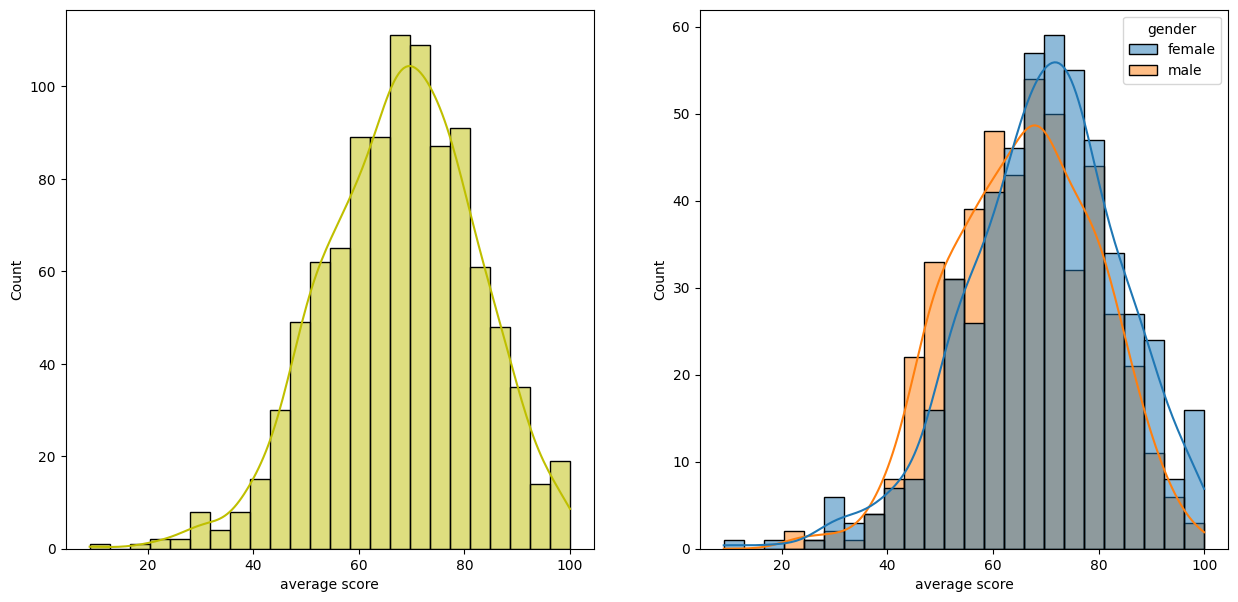

In [9]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average score',color='y',kde=True)
plt.subplot(122)
sns.histplot(data=df,x='average score',hue='gender',kde=True)
plt.show()

# Same graph will be ploted for total scores here because average is a total score divide by constant

* female students perform well than male students

<Axes: xlabel='average score', ylabel='Count'>

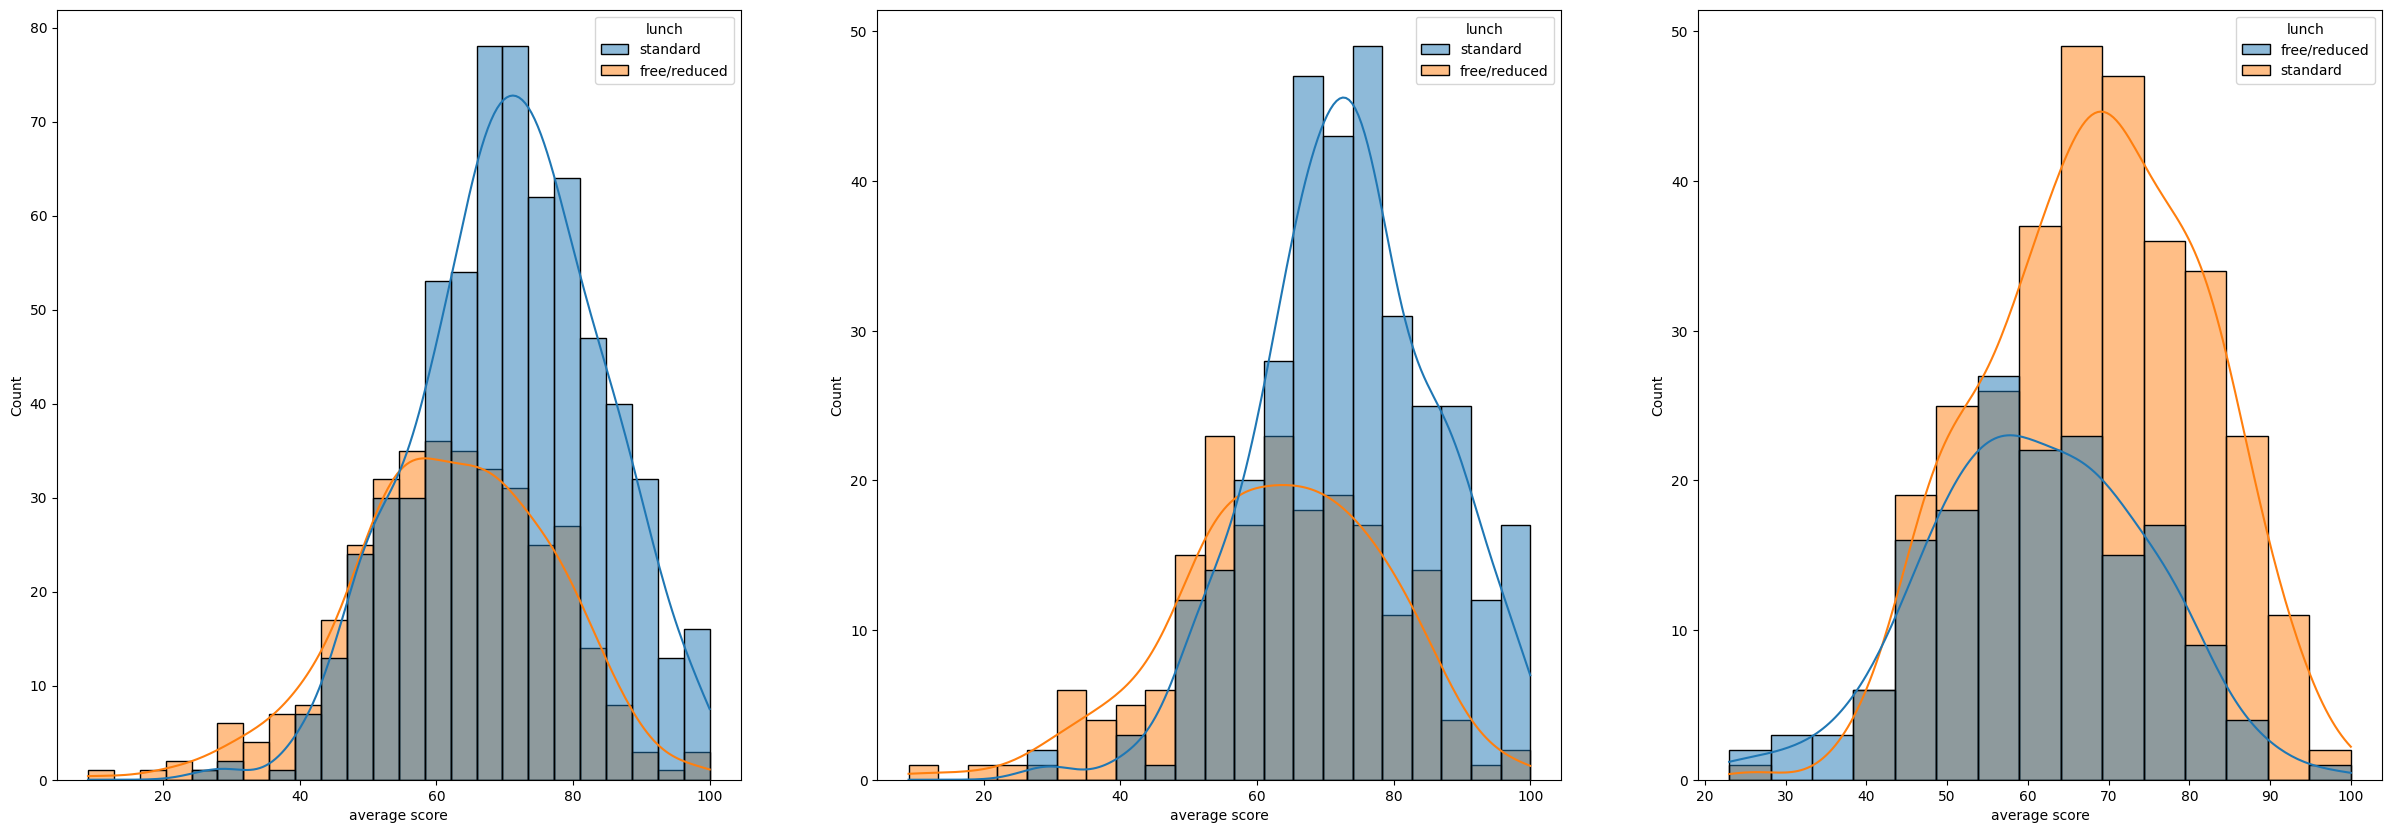

In [10]:
plt.subplots(1,3,figsize=(30,10))
plt.subplot(131)
sns.histplot(data=df, x='average score', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average score', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average score', kde=True, hue='lunch')


* standard lunch helps to perform well

<Axes: xlabel='average score', ylabel='Count'>

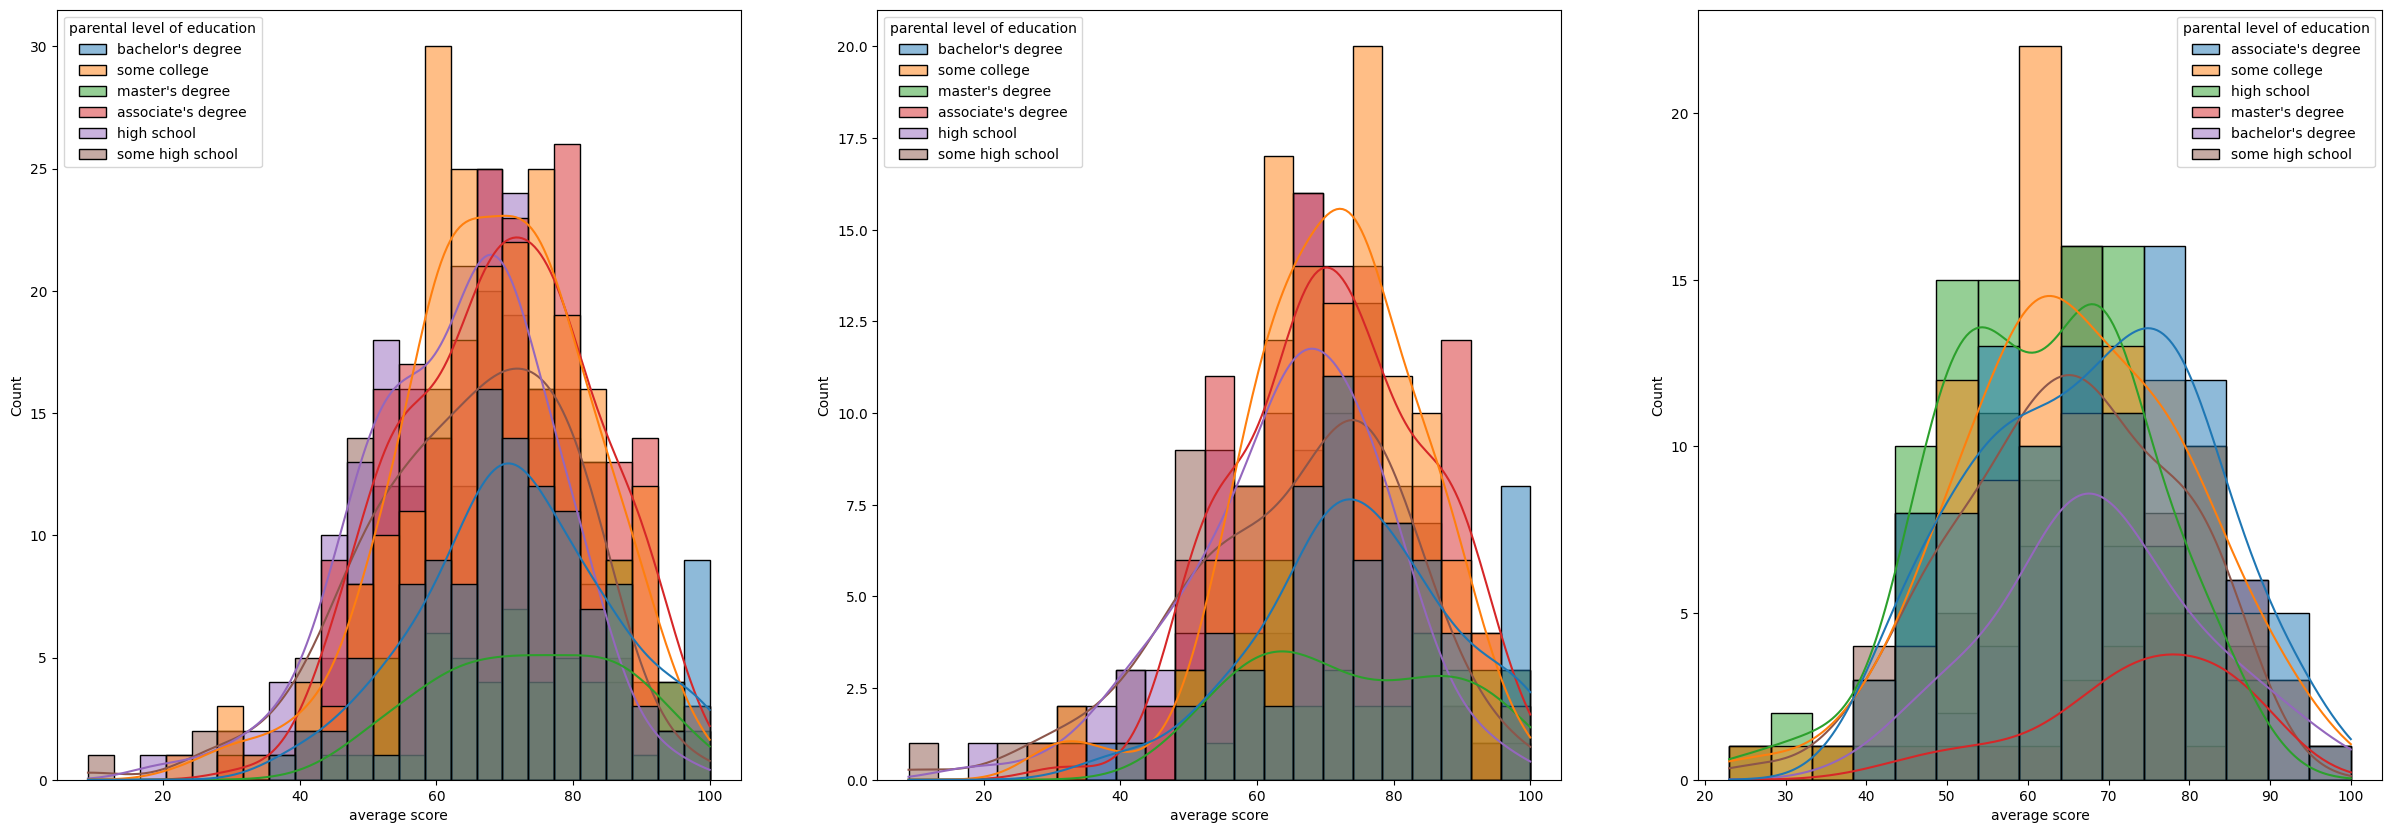

In [11]:
plt.subplots(1,3,figsize=(30,10))
plt.subplot(131)
sns.histplot(data=df, x='average score', kde=True, hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average score', kde=True, hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average score', kde=True, hue='parental level of education')


* there is no much influence of parental education because the count is less when comapred

<Axes: xlabel='average score', ylabel='Count'>

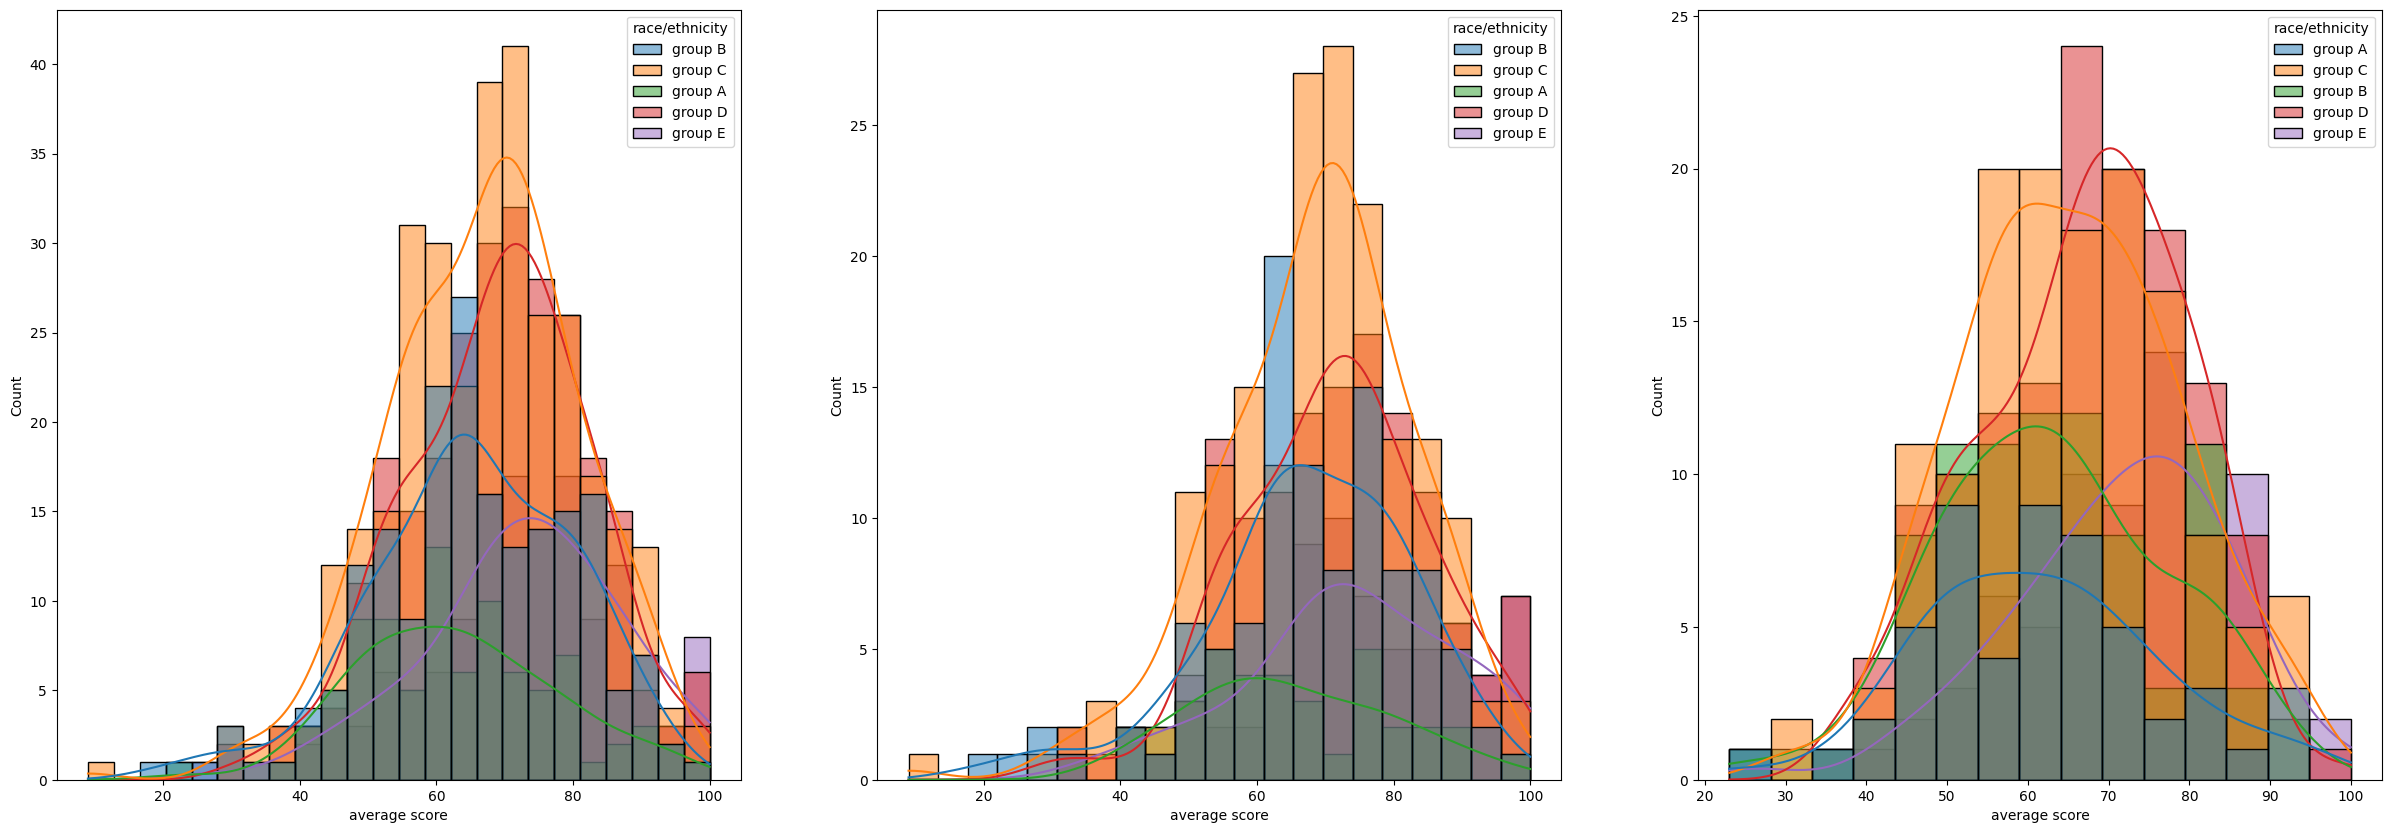

In [12]:
plt.subplots(1,3,figsize=(30,10))
plt.subplot(131)
sns.histplot(data=df, x='average score', kde=True, hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average score', kde=True, hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average score', kde=True, hue='race/ethnicity')


* students of group a and b perform poorly

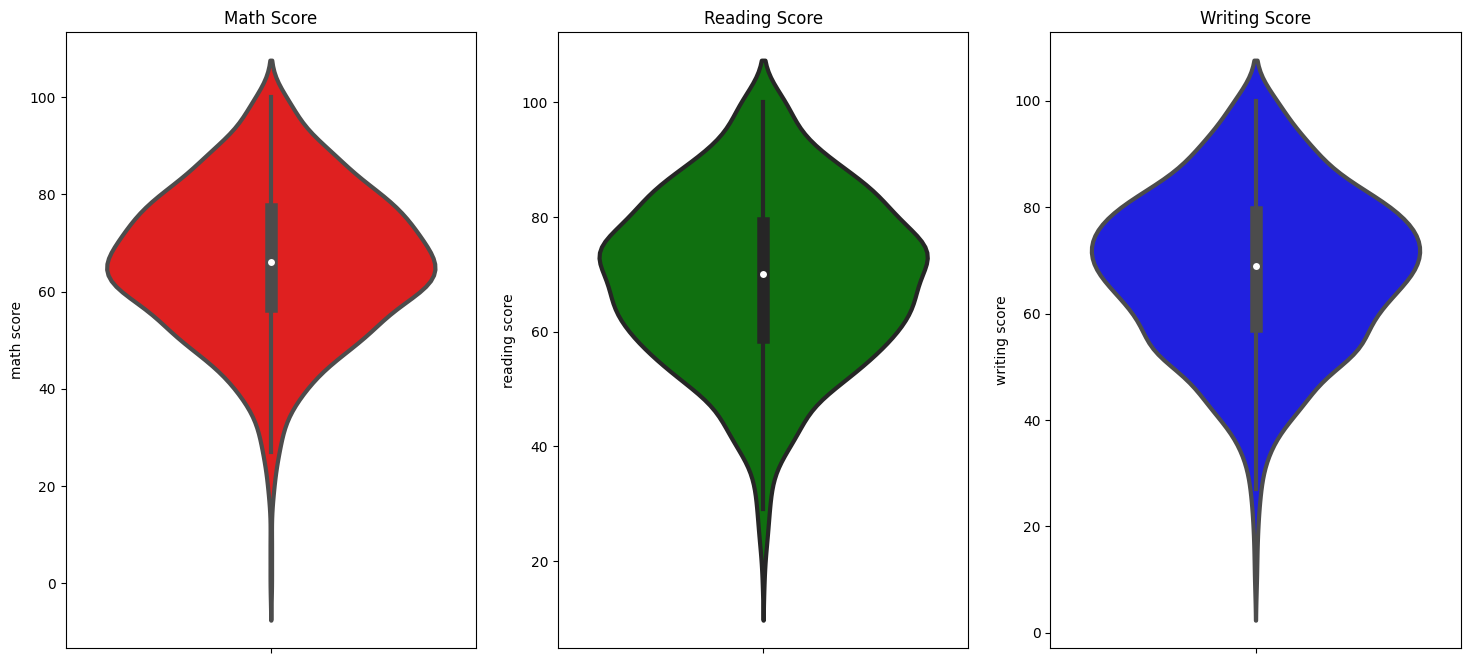

In [13]:
plt.figure(figsize=(18,8))
plt.subplot(131)
plt.title("Math Score")
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(132)
plt.title("Reading Score")
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(133)
plt.title("Writing Score")
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

* it is evident that most of students score for maths in range of 60-80 and for reading and writing in range of 50 - 80

### Multivariate Analysis using PiePlot

gender
female    518
male      482
Name: count, dtype: int64
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
test preparation course
none         642
completed    358
Name: count, dtype: int64
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


(-1.25, 1.25, -1.25, 1.25)

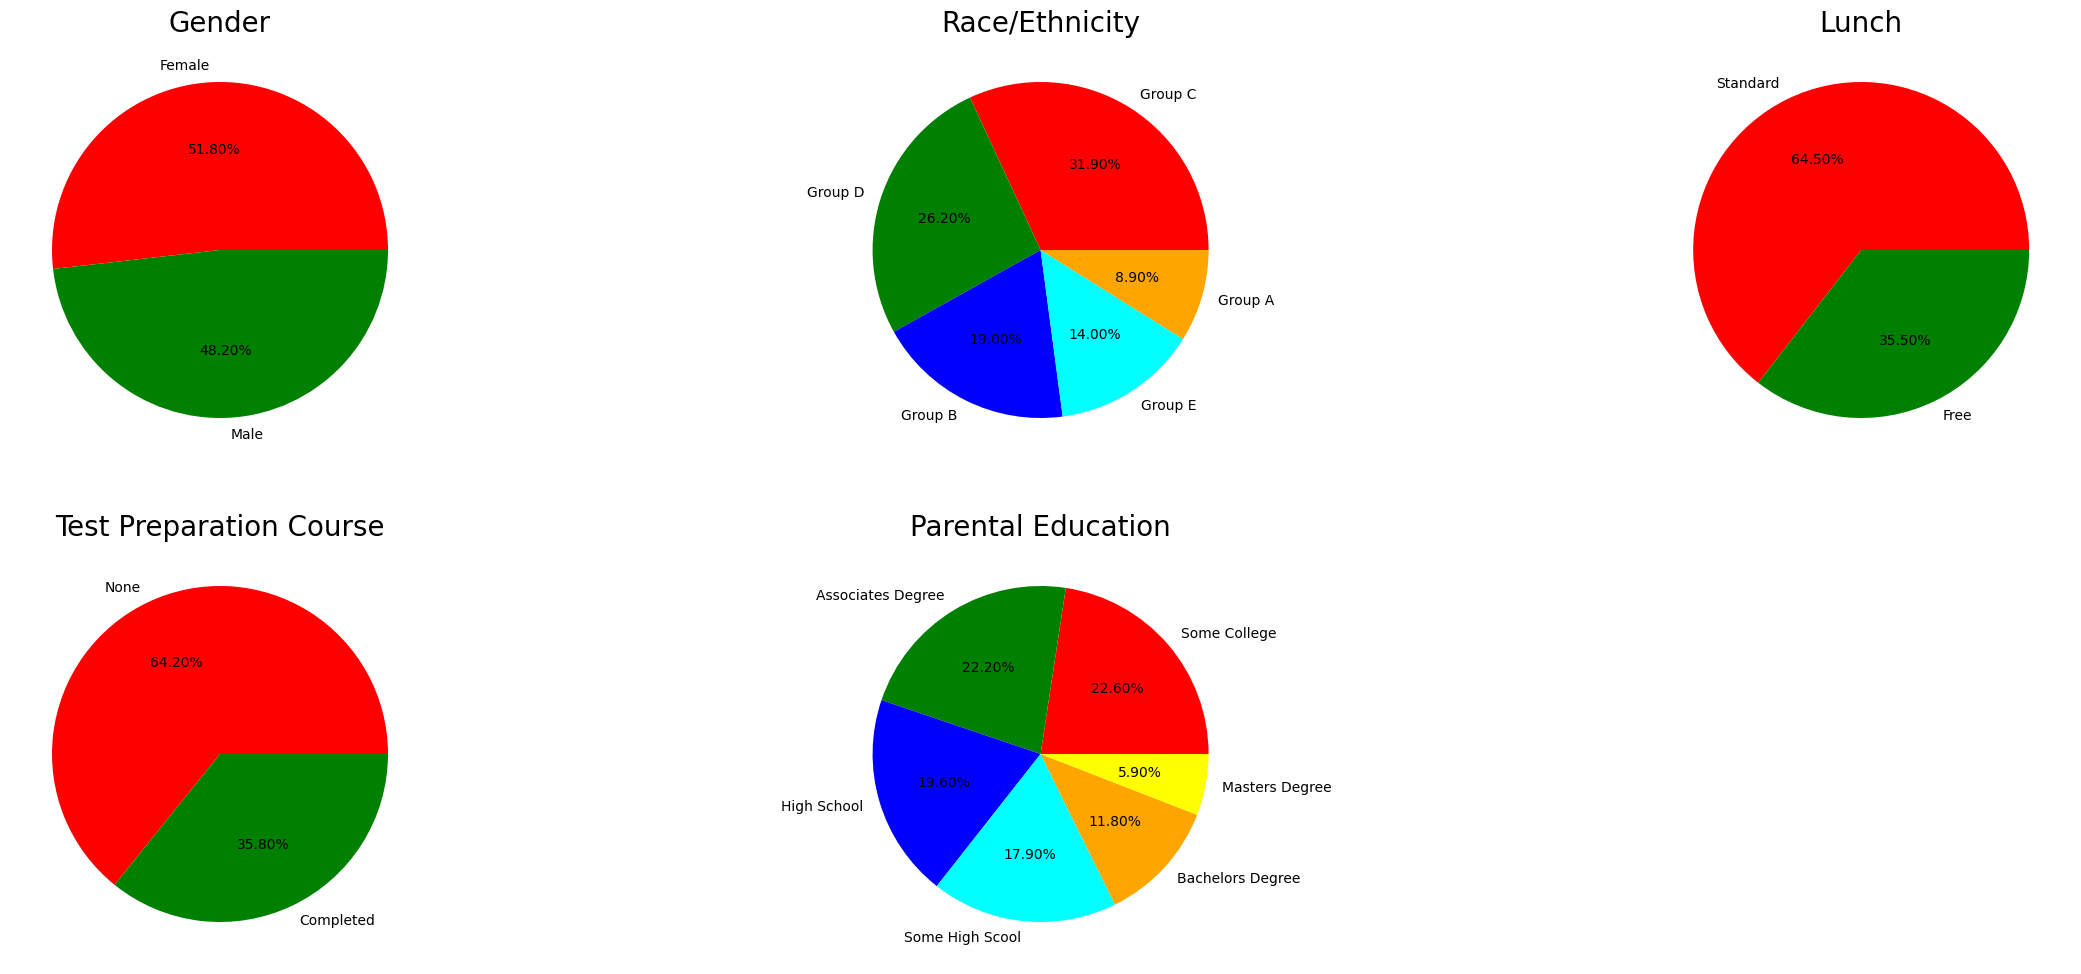

In [14]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(231)
size=df['gender'].value_counts()
print(size)
labels='Female','Male'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(232)
size=df['race/ethnicity'].value_counts()
print(size)
labels='Group C','Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Race/Ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(233)
size=df['lunch'].value_counts()
print(size)
labels='Standard','Free'
color = ['red', 'green']
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(234)
size=df['test preparation course'].value_counts()
print(size)
labels='None','Completed'
color = ['red', 'green']
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Test Preparation Course',fontsize=20)
plt.axis('off')

plt.subplot(235)
size=df['parental level of education'].value_counts()
print(size)
labels='Some College','Associates Degree','High School','Some High Scool','Bachelors Degree','Masters Degree'
color = ['red', 'green', 'blue', 'cyan','orange','yellow']
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Parental Education',fontsize=20)
plt.axis('off')

### Univariate Analysis - Genderwise

[<BarContainer object of 2 artists>]


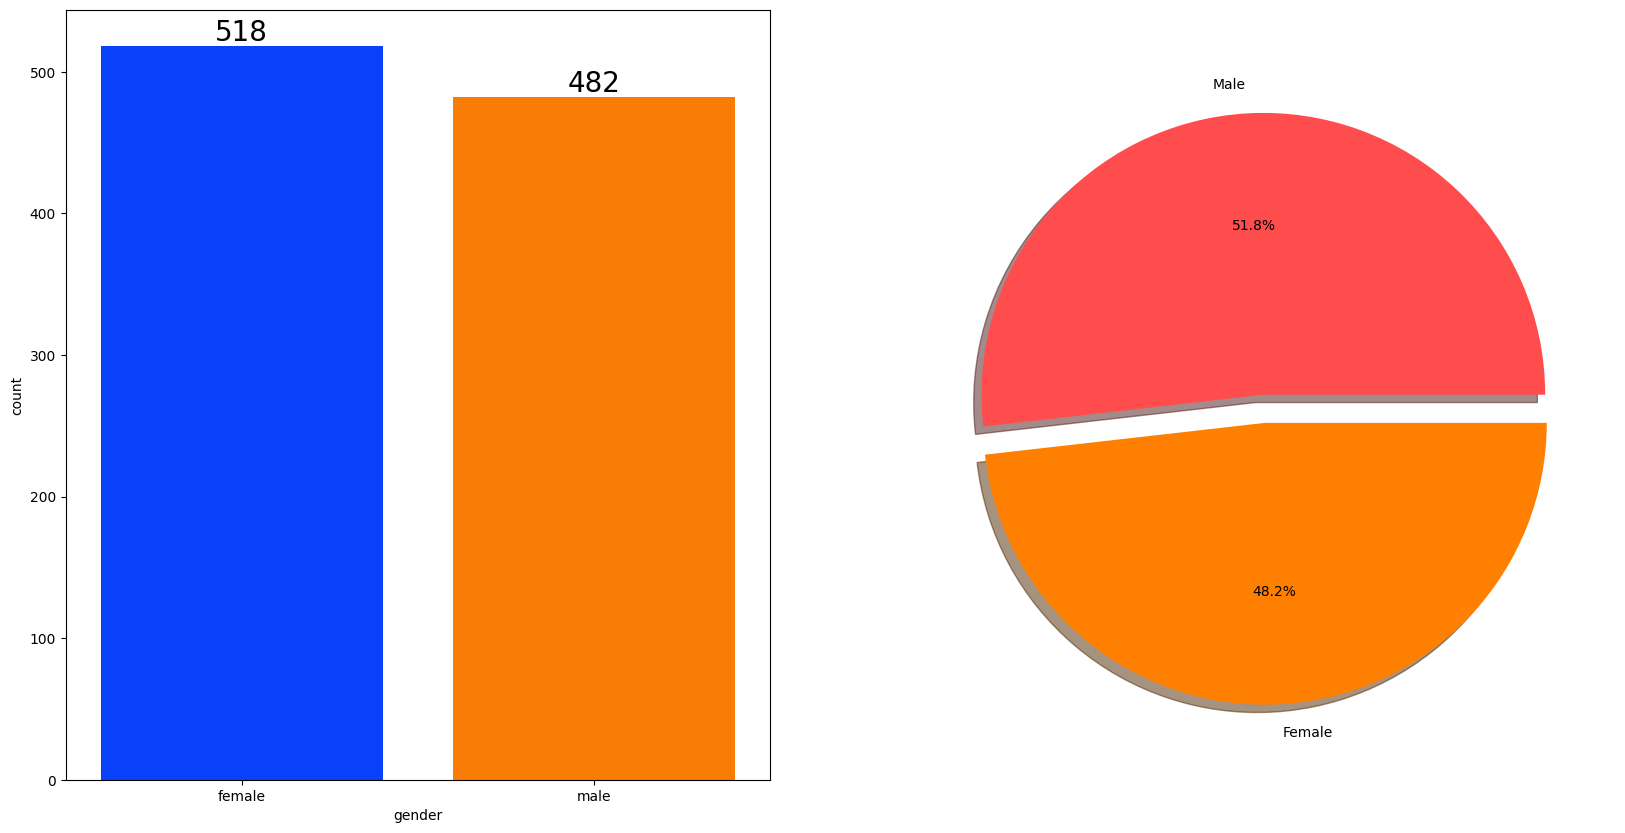

In [15]:
fi,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
print(ax[0].containers)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(), labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### Bivariate Analysis - Genderwise

In [16]:
gender_group=df.drop(['race/ethnicity','parental level of education','lunch','test preparation course'],axis=1).groupby('gender').mean()
print(gender_group)

        math score  reading score  writing score  total score  average score
gender                                                                      
female   63.633205      72.608108      72.467181   208.708494      69.569498
male     68.728216      65.473029      63.311203   197.512448      65.837483


[69.56949806949807, 63.633204633204635]
[65.8374827109267, 68.72821576763485]
[0 1]


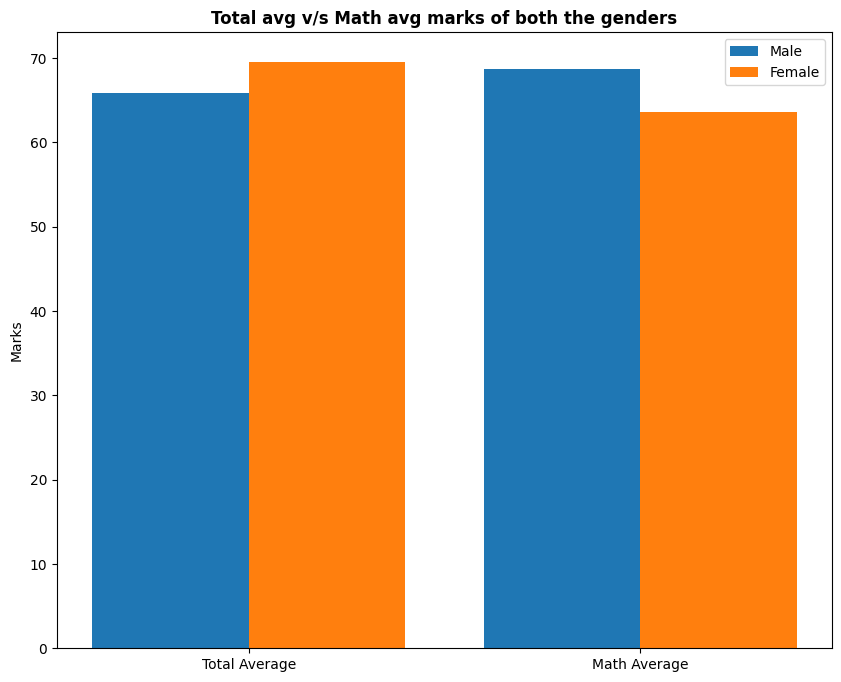

In [17]:
plt.figure(figsize=(10,8))

X=['Total Average','Math Average']

female_scores=[gender_group['average score'][0],gender_group['math score'][0]]
male_scores=[gender_group['average score'][1],gender_group['math score'][1]]
print(female_scores)
print(male_scores)

X_axis=np.arange(len(X))
print(X_axis)

plt.bar(X_axis-0.2,male_scores,0.4,label='Male')
plt.bar(X_axis+0.2,female_scores,0.4,label='Female')

plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total avg v/s Math avg marks of both the genders",fontweight='bold')
plt.legend()
plt.show()

### Univariate Analysis -Groupwise

### 

<BarContainer object of 5 artists>


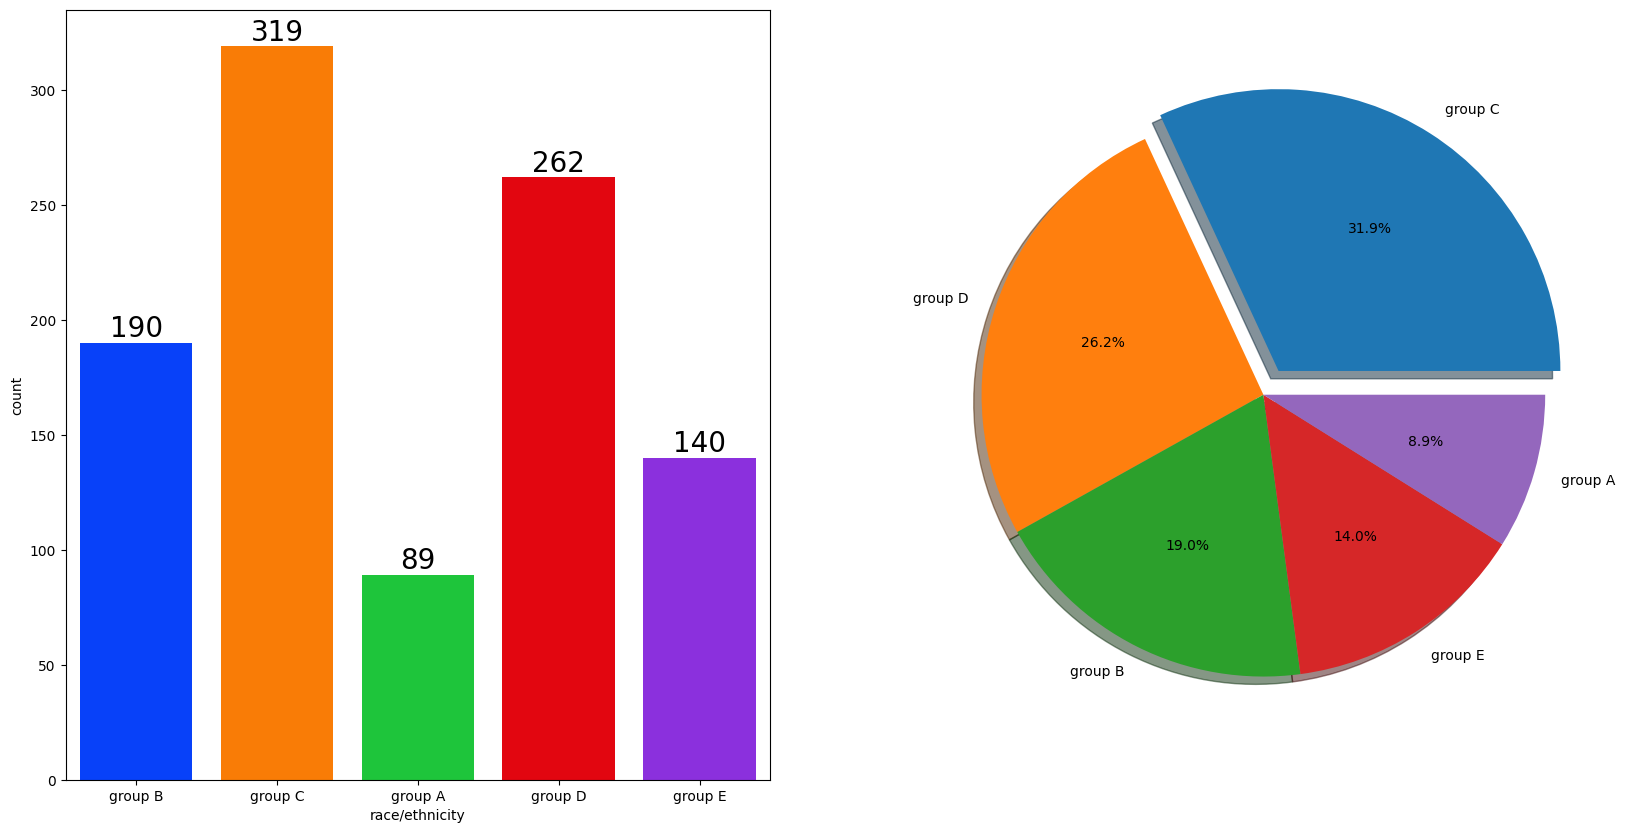

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)

for container in ax[0].containers:
    print(container)
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,
              explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

Group C and D has majority and Gorup A has very minimal number of students

### Bivariate Analysis -Groupwise

In [33]:
group_data=df.groupby('race/ethnicity')
print(group_data.all())

                gender  parental level of education  lunch   
race/ethnicity                                               
group A           True                         True   True  \
group B           True                         True   True   
group C           True                         True   True   
group D           True                         True   True   
group E           True                         True   True   

                test preparation course  math score  reading score   
race/ethnicity                                                       
group A                            True        True           True  \
group B                            True        True           True   
group C                            True       False           True   
group D                            True        True           True   
group E                            True        True           True   

                writing score  total score  average score  
race/ethnicity